In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric import smoothers_lowess
from pandas import Series, DataFrame
from patsy import dmatrices
from sklearn import datasets, svm
# from KaggleAux import predict as ka # see github.com/agconti/kaggleaux for more details

In [6]:
# For .read_csv, always use header=0 when you know row 0 is the header row
df = pd.read_csv('./dataset/ElectionsData.csv', header=0)

#### Clean missing data

In [8]:
df = df.dropna()

In [13]:
df.head()

,Vote,Occupation_Satisfaction,Avg_monthly_expense_when_under_age_21,AVG_lottary_expanses,Most_Important_Issue,Avg_Residancy_Altitude,Looking_at_poles_results,Yearly_ExpensesK,Married,Gender,...,Last_school_grades,Age_group,Number_of_differnt_parties_voted_for,Political_interest_Total_Score,Number_of_valued_Kneset_members,Main_transportation,Occupation,Overall_happiness_score,Num_of_kids_born_last_10_years,Financial_agenda_matters
0,Yellows,9,901.074249,174664.625237,Education,300.358083,No,581.521308,No,Male,...,100,45_and_up,1,1067.419550,14,Motorcycle_or_truck,Industry_or_other,897.297947,0,No
1,Reds,4,172.175470,23146.728293,Education,57.391823,No,403.310559,Yes,Female,...,100,30-45,0,1111.093591,10,Public_or_other,Industry_or_other,861.981391,0,No
2,Whites,3,408.262789,97198.945759,Foreign_Affairs,136.087596,No,714.238096,No,Male,...,40,30-45,1,1260.064170,20,Public_or_other,Public_Sector,819.390492,1,Yes
3,Blues,4,401.755874,52952.486970,Financial,133.918625,No,395.407936,Yes,Male,...,60,30-45,3,837.907521,5,Car,Industry_or_other,584.598207,1,No
4,Blues,5,210.935361,29798.270086,Healthcare,70.311787,No,423.801917,Yes,Female,...,80,30-45,2,859.308498,4,Motorcycle_or_truck,Services_or_Retail,595.206111,1,No


In [ ]:
# specifies the parameters of our graphs
fig = plt.figure(figsize=(18,6), dpi=1600) 
alpha=alpha_scatterplot = 0.2 
alpha_bar_chart = 0.55

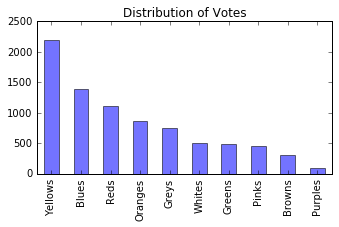

In [12]:
# lets us plot many diffrent shaped graphs together 
ax1 = plt.subplot2grid((2,3),(0,0))
# plots a bar graph of those who surived vs those who did not.               
df.Vote.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
# puts a title on our graph
plt.title("Distribution of Votes") 

#### add vote as int column

In [66]:
f='Vote'
df[f] = df[f].astype("category")
df[f+"Int"] = df[f].cat.rename_categories(range(df[f].nunique())).astype(int)
df.loc[df[f].isnull(), f+"Int"] = np.nan #fix NaN conversion

def print_vote_as_int():    
    vote_options = np.asarray(df.Vote.astype('category').cat.categories)
    for color in vote_options:
        print (color + ': ' + str(int(df[df.Vote == color].iloc[0].VoteInt)))

Blues: 0
Browns: 1
Greens: 2
Greys: 3
Oranges: 4
Pinks: 5
Purples: 6
Reds: 7
Whites: 8
Yellows: 9


Blues: 0
Browns: 1
Greens: 2
Greys: 3
Oranges: 4
Pinks: 5
Purples: 6
Reds: 7
Whites: 8
Yellows: 9


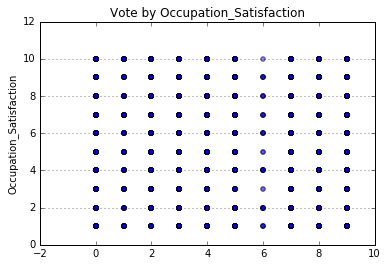

In [67]:
plt.subplot2grid((1,1),(0,0))
plt.scatter(df.VoteInt, df.Occupation_Satisfaction, alpha=alpha_scatterplot)
# sets the y axis lable
plt.ylabel("Occupation_Satisfaction")
# formats the grid line style of our graphs                          
plt.grid(b=True, which='major', axis='y')  
plt.title("Vote by Occupation_Satisfaction")
print_vote_as_int()

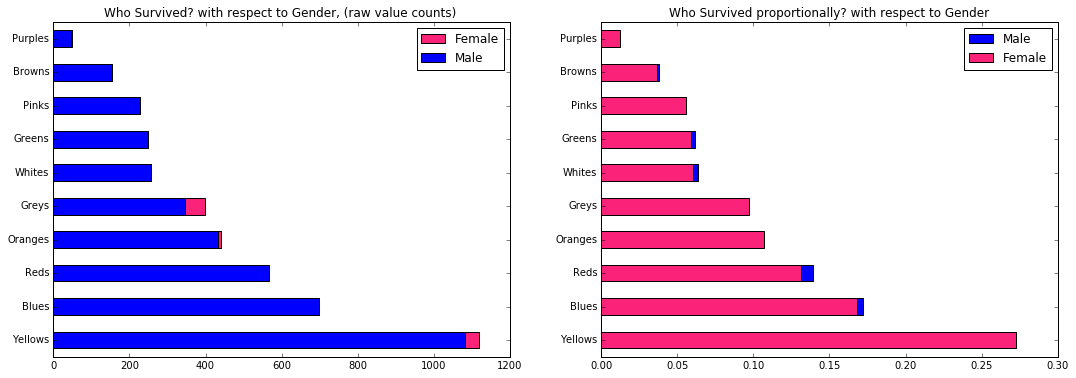

In [85]:
fig = plt.figure(figsize=(18,6))

# create a plot of two subsets, male and female, of the survived variable.
# After we do that we call value_counts() so it can be easily plotted as a bar graph. 
# 'barh' is just a horizontal bar graph
ax1 = fig.add_subplot(121)
df.Vote[df.Gender == 'Female'].value_counts().plot(kind='barh', color='#FA2379',label='Female')
df.Vote[df.Gender == 'Male'].value_counts().plot(kind='barh',label='Male')
# ax1.set_ylim(-1, 2) 
plt.title("Vote with respect to Gender, (raw value counts) "); plt.legend(loc='best')

# adjust graph to display the proportions of survival by gender
ax2 = fig.add_subplot(122)
(df.Vote[df.Gender == 'Male'].value_counts()/float(df.Gender[df.Gender == 'Male'].size)).plot(kind='barh',label='Male')  
(df.Vote[df.Gender == 'Female'].value_counts()/float(df.Gender[df.Gender == 'Female'].size)).plot(kind='barh', color='#FA2379',label='Female')
# ax2.set_ylim(-1, 2)
plt.title("Vote with respect to Gender"); plt.legend(loc='best')

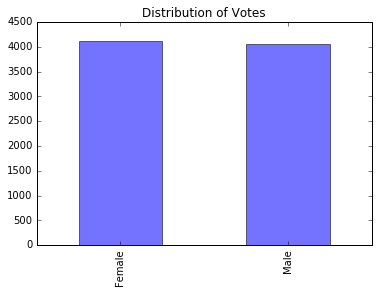

In [74]:
df.Gender.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
plt.title("Distribution of Gender") 

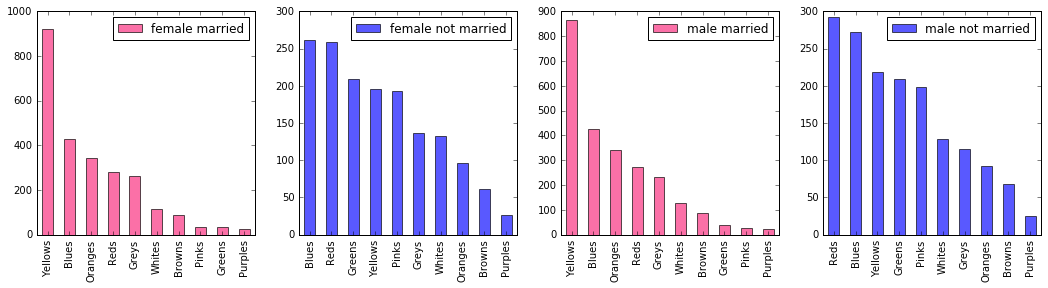

In [102]:
fig = plt.figure(figsize=(18,4), dpi=1600)
alpha_level = 0.65

ax1=fig.add_subplot(141)
female_married = df.Vote[df.Gender == 'Female'][df.Married == 'Yes'].value_counts()
female_married.plot(kind='bar', label='female married', color='#FA2479', alpha=alpha_level)
plt.legend(loc='best')

ax2=fig.add_subplot(142)
female_not_married = df.Vote[df.Gender == 'Female'][df.Married == 'No'].value_counts()
female_not_married.plot(kind='bar', label='female not married', alpha=alpha_level)
plt.legend(loc='best')

ax1=fig.add_subplot(143)
male_married = df.Vote[df.Gender == 'Male'][df.Married == 'Yes'].value_counts()
male_married.plot(kind='bar', label='male married', color='#FA2479', alpha=alpha_level)
plt.legend(loc='best')

ax2=fig.add_subplot(144)
male_not_married = df.Vote[df.Gender == 'Male'][df.Married == 'No'].value_counts()
male_not_married.plot(kind='bar', label='male not married', alpha=alpha_level)
plt.legend(loc='best')